# MNIST Digit CLassification
MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. 

# Dataset: 

### contain gray-scale images of hand-drawn digits, from zero through nine.

####     Files 
        train.csv 
        test.csv 

Each Image = 28x28 (= 784 pixels)

This pixel-value is an integer between 0 and 255, inclusive.


In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D, Dropout, Flatten, Dense

# initialize logger
import logging
logging.basicConfig(level = logging.INFO,
                    format = '%(asctime)s - %(levelname)s - %(message)s')

/home/vesper/anaconda3/envs/aml/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Load train dataset

In [2]:
train = pd.read_csv('dataset/train.csv')
test_x = pd.read_csv('dataset/test.csv')
logging.info('Train Dataset Shape : ' + str(train.shape) )
logging.info('Test Dataset Shape : ' + str(test_x.shape) )
train.head(3)

2019-01-20 22:46:27,372 - INFO - Train Dataset Shape : (42000, 785)
2019-01-20 22:46:27,373 - INFO - Test Dataset Shape : (28000, 784)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
x = train.iloc[:, 1:].values
y = train.iloc[:, 0].values
logging.info('x Shape : ' + str(x.shape) )
logging.info('y Shape : ' + str(y.shape) )

2019-01-20 22:46:29,275 - INFO - x Shape : (42000, 784)
2019-01-20 22:46:29,276 - INFO - y Shape : (42000,)


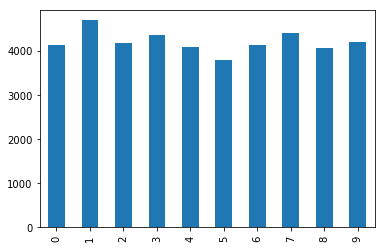

In [4]:
train['label'].value_counts().sort_index().plot.bar()

### Reshape Images to 2-d vector

In [5]:
logging.info('Before : x Shape : ' + str(x.shape) )
logging.info('Before : test_x Shape : ' + str(x.shape) )
x = np.array(x).reshape((x.shape[0], 28, 28,1))
test_x = np.array(test_x).reshape((test_x.shape[0], 28, 28,1))
logging.info('After: x Shape : ' + str(x.shape) )
logging.info('After: test_x Shape : ' + str(test_x.shape) )

2019-01-20 22:47:00,982 - INFO - Before : x Shape : (42000, 784)
2019-01-20 22:47:00,982 - INFO - Before : test_x Shape : (42000, 784)
2019-01-20 22:47:01,125 - INFO - After: x Shape : (42000, 28, 28, 1)
2019-01-20 22:47:01,126 - INFO - After: test_x Shape : (28000, 28, 28, 1)


### Visualize Data

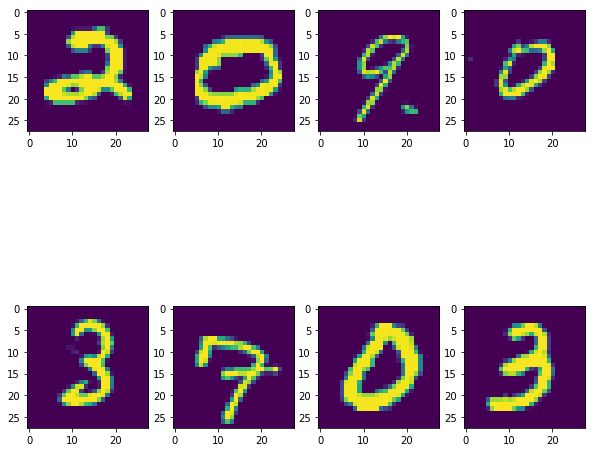

In [19]:
test_x_images = np.array(test_x).reshape((test_x.shape[0], 28, 28))
fig=plt.figure(figsize=(10, 10))
columns = 4
rows = 2
for i in range(1, columns*rows +1):
    img = test_x_images[i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

### Noramalize Images

In [7]:
x = x.astype('float32') / 255.0 - 0.5
test_x = test_x.astype('float32')/255.0 - 0.5

### Convert label to one-hot vector

In [8]:
y = keras.utils.to_categorical(y, 10)

### Split Data into training and Validation

In [9]:
logging.info('Befor: x Shape : ' + str(x.shape) )
logging.info('Befor: y Shape : ' + str(y.shape) )
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.15)
logging.info('After: x_train Shape : ' + str(x.shape) )
logging.info('After: y_train Shape : ' + str(y.shape) )
logging.info('After: x_val Shape : ' + str(x_val.shape) )
logging.info('After: y_val Shape : ' + str(y_val.shape) )

2019-01-20 22:47:17,095 - INFO - Befor: x Shape : (42000, 28, 28, 1)
2019-01-20 22:47:17,096 - INFO - Befor: y Shape : (42000, 10)
2019-01-20 22:47:17,248 - INFO - After: x_train Shape : (42000, 28, 28, 1)
2019-01-20 22:47:17,248 - INFO - After: y_train Shape : (42000, 10)
2019-01-20 22:47:17,248 - INFO - After: x_val Shape : (6300, 28, 28, 1)
2019-01-20 22:47:17,249 - INFO - After: y_val Shape : (6300, 10)


## Build Model

In [48]:


model = Sequential()

# Add CONV1
model.add( Conv2D(
                      filters=256,
                      kernel_size=(2,2),
                      input_shape=(28,28,1)  ))
# Add Pool1
model.add( MaxPool2D( pool_size=(2,2) ))
# Add Dropout
model.add( Dropout(rate=0.2))


# Add CONV2
model.add( Conv2D(
                      filters=256,
                      kernel_size=(2,2) ))
# Add Pool2
model.add( MaxPool2D( pool_size=(2,2) ))
# Add Dropout
model.add( Dropout(rate=0.2))

# Flatten
model.add(Flatten())

# Add Dense Layer 1
model.add( Dense( 256, activation='relu') )
# Add Dropout
model.add( Dropout(rate=0.3))


# Add Final Layer (output layer)
model.add( Dense(10, activation='softmax'))

model.compile( 
                loss='categorical_crossentropy',
                optimizer='rmsprop',
                metrics=['accuracy'])

In [49]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 27, 27, 256)       1280      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 256)       0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 12, 12, 256)       262400    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 6, 6, 256)         0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 6, 6, 256)         0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 9216)              0         
__________

### Train the model

In [56]:
model.fit(x_train, y_train, epochs=30, batch_size=64, validation_data=(x_val, y_val))

Train on 35700 samples, validate on 6300 samples
Epoch 1/30
35700/35700 [==============================] - 7s - loss: 0.0203 - acc: 0.9982 - val_loss: 0.0400 - val_acc: 0.9973
Epoch 2/30
35700/35700 [==============================] - 7s - loss: 0.0217 - acc: 0.9979 - val_loss: 0.0366 - val_acc: 0.9975
Epoch 3/30
35700/35700 [==============================] - 7s - loss: 0.0232 - acc: 0.9978 - val_loss: 0.0369 - val_acc: 0.9975
Epoch 4/30
35700/35700 [==============================] - 6s - loss: 0.0249 - acc: 0.9976 - val_loss: 0.0382 - val_acc: 0.9973
Epoch 5/30
35700/35700 [==============================] - 6s - loss: 0.0217 - acc: 0.9980 - val_loss: 0.0387 - val_acc: 0.9975
Epoch 6/30
35700/35700 [==============================] - 6s - loss: 0.0249 - acc: 0.9979 - val_loss: 0.0493 - val_acc: 0.9963
Epoch 7/30
35700/35700 [==============================] - 6s - loss: 0.0190 - acc: 0.9983 - val_loss: 0.0430 - val_acc: 0.9965
Epoch 8/30
35700/35700 [==============================] - 7s -

In [57]:
logging.info('test_x Shape : ' + str(test_x.shape) )
test_y_pred = model.predict_classes(test_x, batch_size = 64)
logging.info('test_y_pred Shape : ' + str(test_y_pred.shape) )

2019-01-20 23:28:33,767 - INFO - test_x Shape : (28000, 28, 28, 1)


27840/28000 [============================>.] - ETA: 0s

2019-01-20 23:28:35,644 - INFO - test_y_pred Shape : (28000,)


In [58]:
result = pd.Series(test_y_pred, name = "Label")
submit = pd.concat([pd.Series(range(1, 28001), name = "ImageId"), result], axis = 1)
submit.to_csv("Submission.csv", index = False)